In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
#данные по каждому сотруднику 

data_1С=pd.read_excel('FC_HR.xlsx', sheet_name='1С')
data_1С.head()

,Employee ID,Gender,Start date,Quit date,SHIFT,Area,Birthday,Distance
0,18819,м,2018-05-29,2018-07-30,SHIFT 2,PACK_MB,1993-04-30,18.0
1,23072,ж,2019-02-19,2019-03-13,SHIFT 4,PICK,1979-05-03,18.0
2,9083,ж,2015-07-22,2017-04-04,SHIFT 3,RET,1967-07-07,7.0
3,14898,ж,2017-04-07,2017-04-24,SHIFT 1,PACK_MB,1967-12-15,7.0
4,19827,м,2018-08-02,2018-09-28,SHIFT 3,INV,1998-10-04,32.0


In [4]:
#данные по месяцам
data_m=pd.read_excel('FC_HR.xlsx', sheet_name='Data for own')
data_m.head()

,Month,Table #,Process,# of mistakes,Fact productivity,Period,Salary vs Last salary,Vacation,Sick,Worked
0,2018-01-01,15944,PACK_IS,1.0,0.825679,12,-0.332988,0,0,0.715909
1,2018-01-01,14446,PACK_IS,0.0,1.099108,12,-0.134292,0,0,0.750000
2,2018-01-01,7526,UNPACK,1.0,0.000000,12,0.000000,0,0,1.625000
3,2018-01-01,17538,PACK_IS,2.0,0.524397,12,-0.396514,0,0,0.875000
4,2018-01-01,9433,PACK_IS,0.0,0.817813,12,-0.359600,0,0,0.687500


In [5]:
#C помощью merge совмещаем данные
data_m=data_m.merge(data_1С, how='left', left_on='Table #', right_on='Employee ID')
data_m.head()

,Month,Table #,Process,# of mistakes,Fact productivity,Period,Salary vs Last salary,Vacation,Sick,Worked,Employee ID,Gender,Start date,Quit date,SHIFT,Area,Birthday,Distance
0,2018-01-01,15944,PACK_IS,1.0,0.825679,12,-0.332988,0,0,0.715909,15944,ж,2017-08-01,2018-05-31,SHIFT 1,PACK_IS,1969-12-16,18.0
1,2018-01-01,14446,PACK_IS,0.0,1.099108,12,-0.134292,0,0,0.750000,14446,ж,2017-02-14,2018-08-28,SHIFT 1,PACK_IS,1986-10-17,25.0
2,2018-01-01,7526,UNPACK,1.0,0.000000,12,0.000000,0,0,1.625000,7526,м,2015-01-20,2019-10-07,SHIFT 1,UNPACK,1973-06-16,100.0
3,2018-01-01,17538,PACK_IS,2.0,0.524397,12,-0.396514,0,0,0.875000,17538,ж,2017-11-21,NaT,SHIFT 1,PACK_IS,1965-01-14,7.0
4,2018-01-01,9433,PACK_IS,0.0,0.817813,12,-0.359600,0,0,0.687500,NaN,NaN,NaT,NaT,NaN,NaN,NaT,NaN


In [6]:
#Убираем строки по сотрудникам, которые нет в листе 1C
data_m=data_m[data_m['Gender'].notnull()]

In [7]:
#Удаляем ненужную таблицу и смотрим необходимую
del data_1С
data_m.head()

,Month,Table #,Process,# of mistakes,Fact productivity,Period,Salary vs Last salary,Vacation,Sick,Worked,Employee ID,Gender,Start date,Quit date,SHIFT,Area,Birthday,Distance
0,2018-01-01,15944,PACK_IS,1.0,0.825679,12,-0.332988,0,0,0.715909,15944,ж,2017-08-01,2018-05-31,SHIFT 1,PACK_IS,1969-12-16,18.0
1,2018-01-01,14446,PACK_IS,0.0,1.099108,12,-0.134292,0,0,0.750000,14446,ж,2017-02-14,2018-08-28,SHIFT 1,PACK_IS,1986-10-17,25.0
2,2018-01-01,7526,UNPACK,1.0,0.000000,12,0.000000,0,0,1.625000,7526,м,2015-01-20,2019-10-07,SHIFT 1,UNPACK,1973-06-16,100.0
3,2018-01-01,17538,PACK_IS,2.0,0.524397,12,-0.396514,0,0,0.875000,17538,ж,2017-11-21,NaT,SHIFT 1,PACK_IS,1965-01-14,7.0
5,2018-01-01,7604,PREMIUM,0.0,0.987461,12,0.027932,0,0,0.772727,7604,ж,2015-02-01,NaT,SHIFT х,RETURNS_GROUP,1963-12-04,18.0


In [8]:
#Добавляем стобцы - месяц увольненияи месяц начала работы
data_m['Quit_month']=pd.to_datetime(data_m['Quit date']).dt.to_period('M').dt.to_timestamp()
data_m['Start_month']=pd.to_datetime(data_m['Start date']).dt.to_period('M').dt.to_timestamp()
data_m.head()

,Month,Table #,Process,# of mistakes,Fact productivity,Period,Salary vs Last salary,Vacation,Sick,Worked,Employee ID,Gender,Start date,Quit date,SHIFT,Area,Birthday,Distance,Quit_month,Start_month
0,2018-01-01,15944,PACK_IS,1.0,0.825679,12,-0.332988,0,0,0.715909,15944,ж,2017-08-01,2018-05-31,SHIFT 1,PACK_IS,1969-12-16,18.0,2018-05-01,2017-08-01
1,2018-01-01,14446,PACK_IS,0.0,1.099108,12,-0.134292,0,0,0.750000,14446,ж,2017-02-14,2018-08-28,SHIFT 1,PACK_IS,1986-10-17,25.0,2018-08-01,2017-02-01
2,2018-01-01,7526,UNPACK,1.0,0.000000,12,0.000000,0,0,1.625000,7526,м,2015-01-20,2019-10-07,SHIFT 1,UNPACK,1973-06-16,100.0,2019-10-01,2015-01-01
3,2018-01-01,17538,PACK_IS,2.0,0.524397,12,-0.396514,0,0,0.875000,17538,ж,2017-11-21,NaT,SHIFT 1,PACK_IS,1965-01-14,7.0,NaT,2017-11-01
5,2018-01-01,7604,PREMIUM,0.0,0.987461,12,0.027932,0,0,0.772727,7604,ж,2015-02-01,NaT,SHIFT х,RETURNS_GROUP,1963-12-04,18.0,NaT,2015-02-01


In [9]:
#Создаем переменную Leaver - целевая переменная
data_m['Leaver']=data_m.apply(lambda x: 1 if x['Month']==x['Quit_month']
                                  else 0, axis=1)
#Создаем переменную "Новичок"
data_m['Newcommer']=data_m.apply(lambda x: 1 if x['Month']==x['Start_month']
                                  else 0, axis=1)

In [10]:
data_m.head()

,Month,Table #,Process,# of mistakes,Fact productivity,Period,Salary vs Last salary,Vacation,Sick,Worked,Employee ID,Gender,Start date,Quit date,SHIFT,Area,Birthday,Distance,Quit_month,Start_month,Leaver,Newcommer
0,2018-01-01,15944,PACK_IS,1.0,0.825679,12,-0.332988,0,0,0.715909,15944,ж,2017-08-01,2018-05-31,SHIFT 1,PACK_IS,1969-12-16,18.0,2018-05-01,2017-08-01,0,0
1,2018-01-01,14446,PACK_IS,0.0,1.099108,12,-0.134292,0,0,0.750000,14446,ж,2017-02-14,2018-08-28,SHIFT 1,PACK_IS,1986-10-17,25.0,2018-08-01,2017-02-01,0,0
2,2018-01-01,7526,UNPACK,1.0,0.000000,12,0.000000,0,0,1.625000,7526,м,2015-01-20,2019-10-07,SHIFT 1,UNPACK,1973-06-16,100.0,2019-10-01,2015-01-01,0,0
3,2018-01-01,17538,PACK_IS,2.0,0.524397,12,-0.396514,0,0,0.875000,17538,ж,2017-11-21,NaT,SHIFT 1,PACK_IS,1965-01-14,7.0,NaT,2017-11-01,0,0
5,2018-01-01,7604,PREMIUM,0.0,0.987461,12,0.027932,0,0,0.772727,7604,ж,2015-02-01,NaT,SHIFT х,RETURNS_GROUP,1963-12-04,18.0,NaT,2015-02-01,0,0


In [11]:
#Создаем переменную, которыа отвечает за послеующий месяц
data_m['Period_2']=data_m['Period']+1

In [12]:
#Совмещаем таблицы, чтобы знать уволится сотрудник или нет на основании данных предыдущего месяца
data=data_m.merge(data_m[['Table #','Leaver','Period']], how='inner',left_on=['Table #','Period_2'], right_on=['Table #','Period'])

In [13]:
#Убираем тех сотрудников, которые работы на процессах, где не исчесляется продуктивность
data=data[data['Fact productivity']!=0].copy()
data.head()

,Month,Table #,Process,# of mistakes,Fact productivity,Period_x,Salary vs Last salary,Vacation,Sick,Worked,Employee ID,Gender,Start date,Quit date,SHIFT,Area,Birthday,Distance,Quit_month,Start_month,Leaver_x,Newcommer,Period_2,Leaver_y,Period_y
0,2018-01-01,15944,PACK_IS,1.0,0.825679,12,-0.332988,0,0,0.715909,15944,ж,2017-08-01,2018-05-31,SHIFT 1,PACK_IS,1969-12-16,18.0,2018-05-01,2017-08-01,0,0,13,0,13
1,2018-01-01,14446,PACK_IS,0.0,1.099108,12,-0.134292,0,0,0.750000,14446,ж,2017-02-14,2018-08-28,SHIFT 1,PACK_IS,1986-10-17,25.0,2018-08-01,2017-02-01,0,0,13,0,13
3,2018-01-01,17538,PACK_IS,2.0,0.524397,12,-0.396514,0,0,0.875000,17538,ж,2017-11-21,NaT,SHIFT 1,PACK_IS,1965-01-14,7.0,NaT,2017-11-01,0,0,13,0,13
4,2018-01-01,7604,PREMIUM,0.0,0.987461,12,0.027932,0,0,0.772727,7604,ж,2015-02-01,NaT,SHIFT х,RETURNS_GROUP,1963-12-04,18.0,NaT,2015-02-01,0,0,13,0,13
5,2018-01-01,15930,PACK_IS,0.0,0.860234,12,-0.449859,0,0,0.687500,15930,ж,2017-08-01,NaT,SHIFT 1,PACK_IS,1986-03-31,7.0,NaT,2017-08-01,0,0,13,0,13


In [14]:
#убираем данные по периоду 0, так как для него не известно, что было в предыдущем месяце
data=data[data['Period_x']!=0].copy()

In [15]:
#Добавляем переменную - конец месяца для опеределения опыта работы сотрудника
from pandas.tseries.offsets import DateOffset
data['Month end']=data['Month'] + DateOffset(months=1)
data.head()

,Month,Table #,Process,# of mistakes,Fact productivity,Period_x,Salary vs Last salary,Vacation,Sick,Worked,Employee ID,Gender,Start date,Quit date,SHIFT,Area,Birthday,Distance,Quit_month,Start_month,Leaver_x,Newcommer,Period_2,Leaver_y,Period_y,Month end
0,2018-01-01,15944,PACK_IS,1.0,0.825679,12,-0.332988,0,0,0.715909,15944,ж,2017-08-01,2018-05-31,SHIFT 1,PACK_IS,1969-12-16,18.0,2018-05-01,2017-08-01,0,0,13,0,13,2018-02-01
1,2018-01-01,14446,PACK_IS,0.0,1.099108,12,-0.134292,0,0,0.750000,14446,ж,2017-02-14,2018-08-28,SHIFT 1,PACK_IS,1986-10-17,25.0,2018-08-01,2017-02-01,0,0,13,0,13,2018-02-01
3,2018-01-01,17538,PACK_IS,2.0,0.524397,12,-0.396514,0,0,0.875000,17538,ж,2017-11-21,NaT,SHIFT 1,PACK_IS,1965-01-14,7.0,NaT,2017-11-01,0,0,13,0,13,2018-02-01
4,2018-01-01,7604,PREMIUM,0.0,0.987461,12,0.027932,0,0,0.772727,7604,ж,2015-02-01,NaT,SHIFT х,RETURNS_GROUP,1963-12-04,18.0,NaT,2015-02-01,0,0,13,0,13,2018-02-01
5,2018-01-01,15930,PACK_IS,0.0,0.860234,12,-0.449859,0,0,0.687500,15930,ж,2017-08-01,NaT,SHIFT 1,PACK_IS,1986-03-31,7.0,NaT,2017-08-01,0,0,13,0,13,2018-02-01


In [16]:
#добавляем переменную опыыта рабоыт сотрудника
data['Tenure']=data['Month end']-data['Start date']
data['Tenure']=data['Tenure']/np.timedelta64(1,'D')

In [17]:
#Вычисляем сотрудников, у которых не заполнены поля Дата рождения и дистанция от дома
data[data['Birthday'].isnull()]['Table #'].nunique()

211

In [18]:
data[data['Distance'].isnull()]['Table #'].nunique()

244

In [19]:
#Создаем переменную, показывающую возраст на момент рассматриваемого месяца
from datetime import timedelta
data['Age'] = data['Month'] - data['Birthday']
data['Age']  = data['Age']  / timedelta(days=365)

In [20]:
data.head()

,Month,Table #,Process,# of mistakes,Fact productivity,Period_x,Salary vs Last salary,Vacation,Sick,Worked,Employee ID,Gender,Start date,Quit date,SHIFT,Area,Birthday,Distance,Quit_month,Start_month,Leaver_x,Newcommer,Period_2,Leaver_y,Period_y,Month end,Tenure,Age
0,2018-01-01,15944,PACK_IS,1.0,0.825679,12,-0.332988,0,0,0.715909,15944,ж,2017-08-01,2018-05-31,SHIFT 1,PACK_IS,1969-12-16,18.0,2018-05-01,2017-08-01,0,0,13,0,13,2018-02-01,184.0,48.076712
1,2018-01-01,14446,PACK_IS,0.0,1.099108,12,-0.134292,0,0,0.750000,14446,ж,2017-02-14,2018-08-28,SHIFT 1,PACK_IS,1986-10-17,25.0,2018-08-01,2017-02-01,0,0,13,0,13,2018-02-01,352.0,31.230137
3,2018-01-01,17538,PACK_IS,2.0,0.524397,12,-0.396514,0,0,0.875000,17538,ж,2017-11-21,NaT,SHIFT 1,PACK_IS,1965-01-14,7.0,NaT,2017-11-01,0,0,13,0,13,2018-02-01,72.0,53.000000
4,2018-01-01,7604,PREMIUM,0.0,0.987461,12,0.027932,0,0,0.772727,7604,ж,2015-02-01,NaT,SHIFT х,RETURNS_GROUP,1963-12-04,18.0,NaT,2015-02-01,0,0,13,0,13,2018-02-01,1096.0,54.115068
5,2018-01-01,15930,PACK_IS,0.0,0.860234,12,-0.449859,0,0,0.687500,15930,ж,2017-08-01,NaT,SHIFT 1,PACK_IS,1986-03-31,7.0,NaT,2017-08-01,0,0,13,0,13,2018-02-01,184.0,31.778082


In [21]:
#Удаляем ненужные столбцы
data.drop(columns=['Table #','Period_x','Employee ID','Start date','Quit date','Leaver_x','Newcommer','Area','Quit_month','Start_month','Period_2','Period_y','Month end','Birthday'], inplace=True)


In [22]:
#Преобразовывем названия процессов
data.loc[data['Process']=='PICK_V', 'Process'] = 'PICK'
data.loc[data['Process']=='PUT_V', 'Process'] = 'PUT'
data.loc[data['Process']=='RET_V', 'Process'] = 'RET'
data.loc[data['Process']=='PACK', 'Process'] = 'PACK_MB'
data.loc[data['Process']=='RETURNS_GROUP', 'Process'] = 'RET'
data.loc[data['Process']=='INDITEX_STOCK', 'Process'] = 'INDITEX'
data.loc[data['Process']=='INDITEX_PACKING', 'Process'] = 'INDITEX'
data.loc[data['Process']=='INDITEX_LOADING', 'Process'] = 'INDITEX'
data.loc[data['Process']=='JEWELRY', 'Process'] = 'PREMIUM'

In [23]:
#Удаляем записи по дополительным процессам
data=data[data['Process']!='INDITEX'].copy()

In [24]:
data=data[data['Process']!='LOAD'].copy()
data=data[data['Process']!='TROUB'].copy()

In [25]:
#Рассматривает только сотрудников опыт работы которых больше 62 дней
data=data[data['Tenure']>62].copy()

In [26]:
#смотрим пустые значения
data.isnull().sum()

Month                      0
Process                    0
# of mistakes              0
Fact productivity          0
Salary vs Last salary      0
Vacation                   0
Sick                       0
Worked                     0
Gender                     0
SHIFT                      0
Distance                 187
Leaver_y                   0
Tenure                     0
Age                       30
dtype: int64

In [27]:
#заплняем пустые значения AGE средним внутри группы Пол+Процесс
data['Age']= data['Age'].fillna(data.groupby(['Gender','Process'])['Age'].transform('mean'))

In [28]:
#заплняем пустые значения DISTANCE средним внутри группы Пол+Процесс
data['Distance']= data['Distance'].fillna(data.groupby(['Gender','Process'])['Distance'].transform('mean'))

In [29]:
#Переназываем целевой признак
data.rename(columns={'Leaver_y':'Leaver'},inplace=True)

# Analysis

In [30]:
#Удаляем ненужный столбец
data.drop(columns='Month',inplace=True)

In [31]:
#импорт модуля для визуализации данных
import sys
!{sys.executable} -m pip install plotly

Leaver

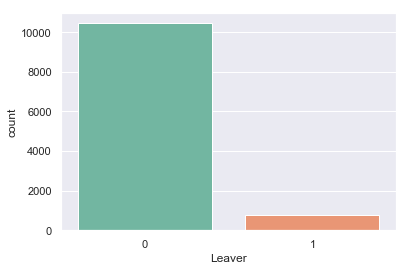

In [44]:
#еще импорт модуля для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette="Set2")
ax = sns.countplot(x="Leaver", data=data)

Process

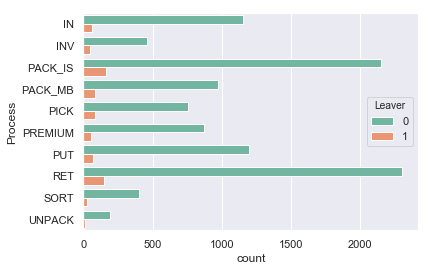

In [33]:
#Смотрим процессы по исследуемым классам
ax = sns.countplot( y='Process', data=data.sort_values('Process'), hue='Leaver')

In [34]:
data_pr=data[data['Leaver']==1].groupby('Process',as_index=False)['Leaver'].count().merge(data.groupby('Process',as_index=False)['Leaver'].count(),on='Process')

data_pr['%, of all']=data_pr['Leaver_x']/data_pr['Leaver_y']
data_pr

,Process,Leaver_x,Leaver_y,"%, of all"
0,IN,61,1214,0.050247
1,INV,48,504,0.095238
2,PACK_IS,162,2311,0.070100
3,PACK_MB,87,1058,0.082231
4,PICK,87,845,0.102959
5,PREMIUM,56,928,0.060345
6,PUT,66,1264,0.052215
7,RET,148,2453,0.060334
8,SORT,28,430,0.065116
9,UNPACK,9,200,0.045000


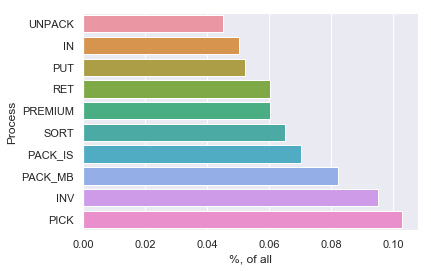

In [35]:

ax = sns.barplot(y="Process", x='%, of all',data=data_pr.sort_values('%, of all'))

Shift

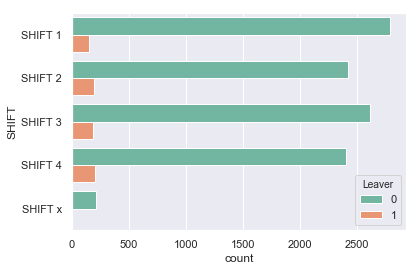

In [36]:

ax = sns.countplot( y='SHIFT', data=data.sort_values('SHIFT'), hue='Leaver')

In [37]:
data_pr=data[data['Leaver']==1].groupby('SHIFT',as_index=False)['Leaver'].count().merge(data.groupby('SHIFT',as_index=False)['Leaver'].count(),on='SHIFT')

data_pr['%, of all']=data_pr['Leaver_x']/data_pr['Leaver_y']
data_pr

,SHIFT,Leaver_x,Leaver_y,"%, of all"
0,SHIFT 1,157,2954,0.053148
1,SHIFT 2,195,2621,0.074399
2,SHIFT 3,189,2808,0.067308
3,SHIFT 4,208,2611,0.079663
4,SHIFT х,3,213,0.014085


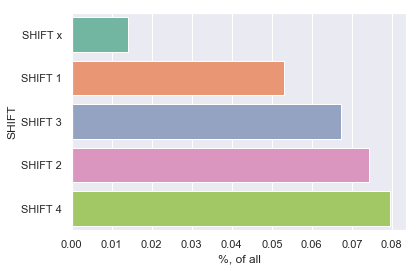

In [38]:
ax = sns.barplot(y="SHIFT", x='%, of all',data=data_pr.sort_values('%, of all'))

Gender

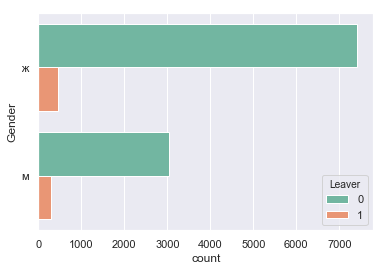

In [39]:
ax = sns.countplot( y='Gender', data=data.sort_values('Gender'), hue='Leaver')

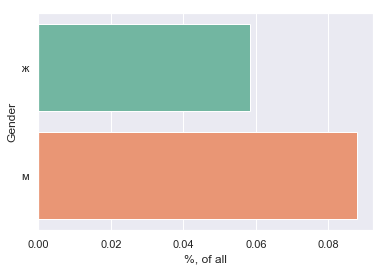

In [40]:
data_pr=data[data['Leaver']==1].groupby('Gender',as_index=False)['Leaver'].count().merge(data.groupby('Gender',as_index=False)['Leaver'].count(),on='Gender')

data_pr['%, of all']=data_pr['Leaver_x']/data_pr['Leaver_y']
ax = sns.barplot(y="Gender", x='%, of all',data=data_pr.sort_values('%, of all'))

In [46]:
#создаем функции для графиков распределения
def overlaid_histogram_notnormed(data1, data2, n_bins, data1_name="", data2_name="", x_label="", y_label="", title=""):
    max_nbins = 10
    data_range = [min(min(data1), min(data2)), max(max(data1), max(data2))]
    binwidth = (data_range[1] - data_range[0]) / max_nbins
    if n_bins == 0:
        bins = np.arange(data_range[0], data_range[1] + binwidth, binwidth)
    else: 
        bins = n_bins
    _, ax = plt.subplots()
    ax.hist(data1, bins = bins, alpha = 0.65, label = data1_name)
    ax.hist(data2, bins = bins, alpha = 0.60, label = data2_name)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'best')
def overlaid_histogram(data1, data2, n_bins, data1_name="",data2_name="",  x_label="", y_label="", title=""):
    max_nbins = 10
    data_range = [min(min(data1), min(data2)), max(max(data1), max(data2))]
    binwidth = (data_range[1] - data_range[0]) / max_nbins
    if n_bins == 0:
        bins = np.arange(data_range[0], data_range[1] + binwidth, binwidth)
    else: 
        bins = n_bins
    _, ax = plt.subplots()
    ax.hist(data1, bins = bins,  alpha = 0.65, label = data1_name, normed=True)
    ax.hist(data2, bins = bins,  alpha = 0.60, label = data2_name, normed=True)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'best')

Age

C:\Users\margarita.hahan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\margarita.hahan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


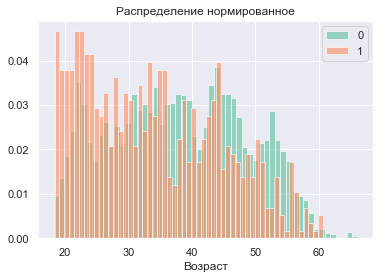

In [47]:
x1=data[(data['Leaver']!=1)]['Age']
x2=data[(data['Leaver']==1)]['Age']
overlaid_histogram(data1=x1,data2=x2,n_bins=55,title='Распределение нормированное',x_label='Возраст',data1_name='0',data2_name='1' )

In [48]:
data.groupby('Leaver')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Leaver,,,,,,,,
0,10455.0,37.980529,10.645833,18.161644,29.497260,37.901370,46.210959,66.169863
1,752.0,33.955508,10.702954,18.326027,24.239726,32.941096,42.715753,60.676712


Mistakes

C:\Users\margarita.hahan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\margarita.hahan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


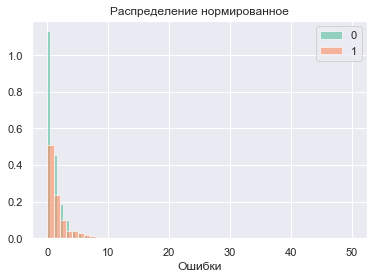

In [49]:
x1=data[(data['Leaver']!=1)]['# of mistakes']
x2=data[(data['Leaver']==1)]['# of mistakes']
overlaid_histogram(data1=x1,data2=x2,n_bins=50,title='Распределение нормированное',x_label='Ошибки',data1_name='0',data2_name='1' )

In [50]:
data.groupby('Leaver')['# of mistakes'].describe()

,count,mean,std,min,25%,50%,75%,max
Leaver,,,,,,,,
0,10455.0,0.928647,1.638591,0.0,0.0,0.0,1.0,25.0
1,752.0,1.321809,2.848627,0.0,0.0,0.0,2.0,50.0


Fact productivity

C:\Users\margarita.hahan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\margarita.hahan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


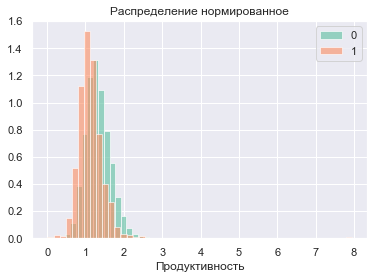

In [52]:

x1=data[(data['Leaver']!=1)]['Fact productivity']
x2=data[(data['Leaver']==1)]['Fact productivity']
overlaid_histogram(data1=x1,data2=x2,n_bins=50,title='Распределение нормированное',x_label='Продуктивность',data1_name='0',data2_name='1' )

Salary

C:\Users\margarita.hahan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\margarita.hahan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


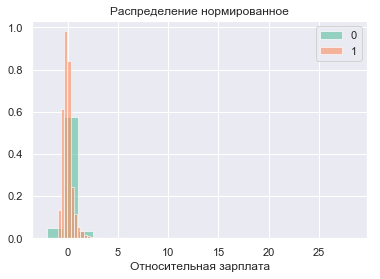

In [55]:
x1=data[(data['Leaver']!=1)]['Salary vs Last salary']
x2=data[(data['Leaver']==1)]['Salary vs Last salary']
overlaid_histogram(data1=x1,data2=x2,n_bins=20,title='Распределение нормированное',x_label='Относительная зарплата',data1_name='0',data2_name='1' )

In [56]:
data.groupby('Leaver')['Salary vs Last salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Leaver,,,,,,,,
0,10455.0,0.134542,0.909173,-2.000000,-0.192745,0.004761,0.235050,28.257539
1,752.0,-0.013103,0.571520,-0.997099,-0.336816,-0.081076,0.172867,5.529866


Vacation

C:\Users\margarita.hahan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\margarita.hahan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


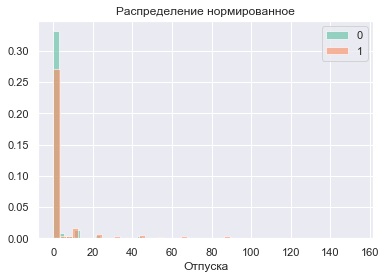

In [57]:
x1=data[(data['Leaver']!=1)]['Vacation']
x2=data[(data['Leaver']==1)]['Vacation']
overlaid_histogram(data1=x1,data2=x2,n_bins=50,title='Распределение нормированное',x_label='Отпуска',data1_name='0',data2_name='1' )

In [58]:
data.groupby('Leaver')['Vacation'].describe()

,count,mean,std,min,25%,50%,75%,max
Leaver,,,,,,,,
0,10455.0,3.297465,12.722889,0.0,0.0,0.0,0.0,132.0
1,752.0,5.507979,17.391932,0.0,0.0,0.0,0.0,154.0


Sick

In [59]:
data.groupby('Leaver')['Sick'].describe()

,count,mean,std,min,25%,50%,75%,max
Leaver,,,,,,,,
0,10455.0,2.209852,11.297470,0.0,0.0,0.0,0.0,154.0
1,752.0,4.731383,18.254881,0.0,0.0,0.0,0.0,154.0


Worked

C:\Users\margarita.hahan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\margarita.hahan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


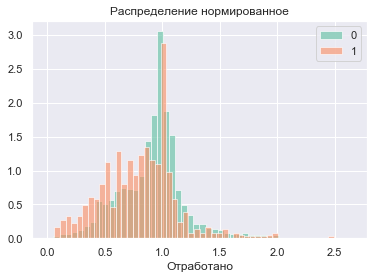

In [60]:
x1=data[(data['Leaver']!=1)]['Worked']
x2=data[(data['Leaver']==1)]['Worked']
overlaid_histogram(data1=x1,data2=x2,n_bins=50,title='Распределение нормированное',x_label='Отработано',data1_name='0',data2_name='1' )

In [61]:
data.groupby('Leaver')['Worked'].describe()

,count,mean,std,min,25%,50%,75%,max
Leaver,,,,,,,,
0,10455.0,0.918508,0.291445,0.0000,0.750000,0.951515,1.042424,2.646645
1,752.0,0.795881,0.326518,0.0625,0.568182,0.812500,1.000000,2.489899


Distance

C:\Users\margarita.hahan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\margarita.hahan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


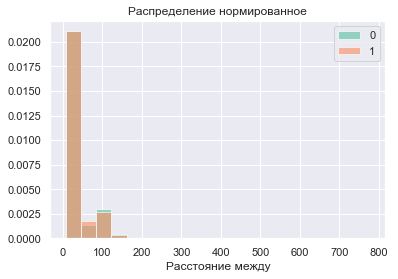

In [63]:
x1=data[(data['Leaver']!=1)]['Distance']
x2=data[(data['Leaver']==1)]['Distance']
overlaid_histogram(data1=x1,data2=x2,n_bins=20,title='Распределение нормированное',x_label='Расстояние между',data1_name='0',data2_name='1' )

In [64]:
data.groupby('Leaver')['Distance'].describe()

,count,mean,std,min,25%,50%,75%,max
Leaver,,,,,,,,
0,10455.0,34.444385,39.280802,7.0,18.0,18.0,25.0,778.0
1,752.0,34.161797,44.962718,7.0,18.0,25.0,32.0,778.0


Correlation matrix

In [65]:
data_2 = data.copy()
correlations = data_2.corr()['Leaver'].sort_values()
print(correlations.tail(4))
print(correlations.head(3))

Vacation         0.042223
Sick             0.052982
# of mistakes    0.056251
Leaver           1.000000
Name: Leaver, dtype: float64
Tenure              -0.140177
Fact productivity   -0.135798
Worked              -0.103828
Name: Leaver, dtype: float64


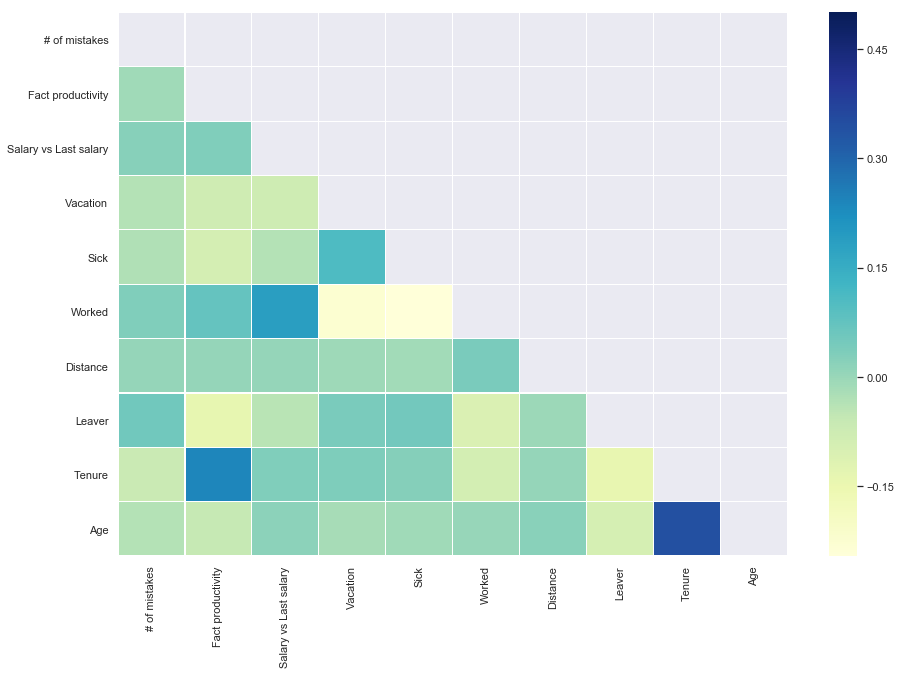

In [66]:
corr = data_2.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            linewidths=.2, cmap="YlGnBu")

# Data preprocessing

In [67]:
# encoding 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_count = 0
for col in data.columns[1:]:
    if data[col].dtype == 'object':
        if len(list(data[col].unique())) <= 2:
            le.fit(data[col])
            data[col] = le.transform(data[col])
            le_count += 1

In [ ]:
data.head()

In [37]:
#Создание dummy - переменных
data = pd.get_dummies(data, drop_first=True)

In [38]:
data.columns

Index(['# of mistakes', 'Fact productivity', 'Salary vs Last salary',
       'Vacation', 'Sick', 'Worked', 'Gender', 'Distance', 'Leaver', 'Tenure',
       'Age', 'Process_INV', 'Process_PACK_IS', 'Process_PACK_MB',
       'Process_PICK', 'Process_PREMIUM', 'Process_PUT', 'Process_RET',
       'Process_SORT', 'Process_UNPACK', 'SHIFT_SHIFT 2', 'SHIFT_SHIFT 3',
       'SHIFT_SHIFT 4', 'SHIFT_SHIFT х'],
      dtype='object')

In [40]:
#Preprocessign using MizMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_col = list(data.columns)
data_col.remove('Leaver')
for col in data_col:
    data[col] = data[col].astype(float)
    data[[col]] = scaler.fit_transform(data[[col]])
data['Leaver'] = pd.to_numeric(data['Leaver'], downcast='float')
data.head()

,# of mistakes,Fact productivity,Salary vs Last salary,Vacation,Sick,Worked,Gender,Distance,Leaver,Tenure,Age,Process_INV,Process_PACK_IS,Process_PACK_MB,Process_PICK,Process_PREMIUM,Process_PUT,Process_RET,Process_SORT,Process_UNPACK,SHIFT_SHIFT 2,SHIFT_SHIFT 3,SHIFT_SHIFT 4,SHIFT_SHIFT х
0,0.02,0.103137,0.055094,0.0,0.0,0.270497,0.0,0.014267,0.0,0.047619,0.623124,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,0.137607,0.061661,0.0,0.0,0.283378,0.0,0.023346,0.0,0.113735,0.272214,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.04,0.065155,0.052995,0.0,0.0,0.330607,0.0,0.000000,0.0,0.003542,0.725675,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,0.123532,0.067022,0.0,0.0,0.291965,0.0,0.014267,0.0,0.406533,0.748901,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.00,0.107493,0.051232,0.0,0.0,0.259763,0.0,0.000000,0.0,0.047619,0.283627,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

print('Size of Full Encoded Dataset: {}'. format(data.shape))

In [ ]:
import sys
!{sys.executable} -m pip install xgboost

In [41]:
# импортируем библетотеки


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

In [45]:
from sklearn.model_selection import train_test_split
target_data = data['Leaver'].copy()
main_data=data.drop(columns='Leaver')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(main_data,target_data,
                                                    test_size=0.25,
                                                      )  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (8405, 23)
Number transactions y_train dataset:  (8405,)
Number transactions X_test dataset:  (2802, 23)
Number transactions y_test dataset:  (2802,)


In [ ]:
 import sys
!{sys.executable} -m pip install imblearn

# Построение моделей

In [69]:
# Библиотеки моделей

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


# Добавление моделей для последущего сравнения
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

In [68]:

#Сравниваем результаты моделей
acc_results = []
auc_results = []
names = []
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=7)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

C:\Users\margarita.hahan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\margarita.hahan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\margarita.hahan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\margarita.hahan\AppData\Local\Continuum\ana

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,75.63,2.51,66.02,1.58
1,Random Forest,74.03,2.49,93.38,0.70
5,Gaussian NB,69.98,4.40,80.82,1.90
3,KNN,59.19,3.68,93.15,0.84
4,Decision Tree Classifier,56.05,2.48,88.77,1.07
2,SVM,51.07,2.72,93.40,0.70


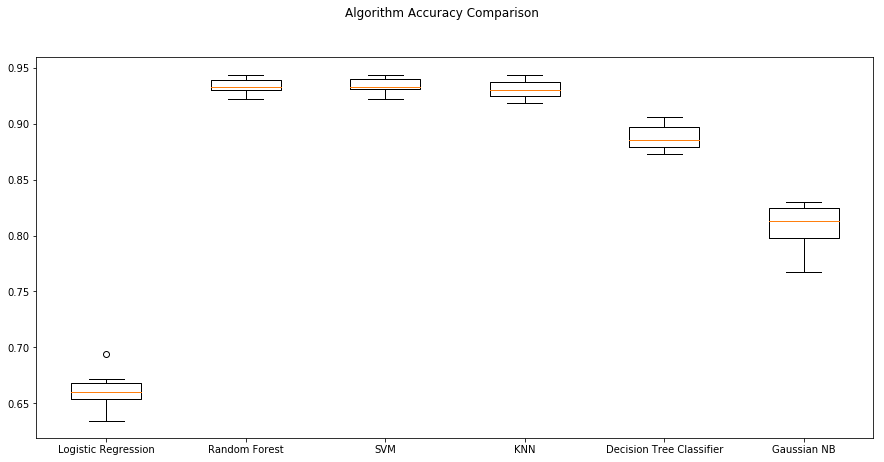

In [69]:

fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

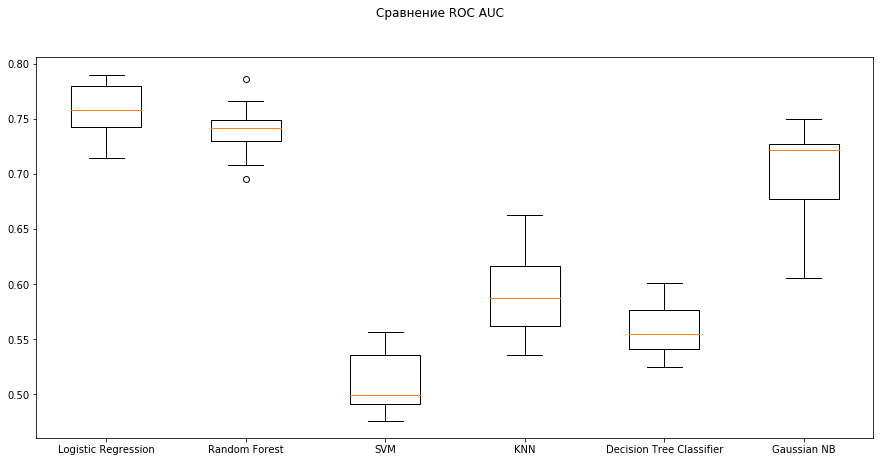

In [71]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Сравнение ROC AUC ')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

# Находим наилучшие гиперпараметры

Logistic Regression

In [48]:

kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(solver='liblinear',
                             class_weight="balanced", 
                             random_state=7)
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

C:\Users\margarita.hahan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


AUC score (STD): 0.76 (0.03)


In [49]:
param_grid = {'C': np.arange(1e-03, 2, 0.01)} 
log_gs = GridSearchCV(LogisticRegression(solver='liblinear',
                                         class_weight="balanced", 
                                         random_state=7),
                      iid=True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

best params: LogisticRegression(C=1.9909999999999997, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
best params: {'C': 1.9909999999999997}
best score: 0.7593592520159207


C:\Users\margarita.hahan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [72]:
# importing libraries for data visualisations
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt

Text(0.5, 257.44, 'Predicted label')

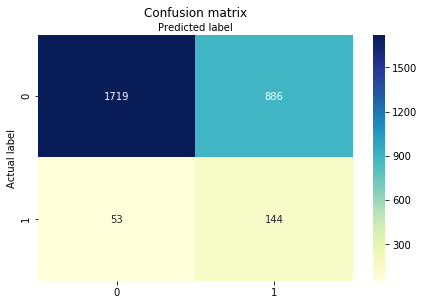

In [51]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, log_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [52]:
#у нас несбалансированная выборка , в связи с чем на Accuracy можно не обращать внимание
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(log_opt.score(X_test, y_test)*100))

Accuracy of Logistic Regression Classifier on test set: 66.49


In [54]:

# Classification report for the optimised Log Regression
log_opt.fit(X_train, y_train)
print(classification_report(y_test, log_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.97      0.66      0.79      2605
         1.0       0.14      0.73      0.23       197

    accuracy                           0.66      2802
   macro avg       0.55      0.70      0.51      2802
weighted avg       0.91      0.66      0.75      2802



In [55]:
log_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = log_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
logit_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % logit_roc_auc)

AUC score: 0.755


Random Forest

In [56]:
rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(rf_classifier,
                        iid=True,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

C:\Users\margarita.hahan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


best params: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)
best params: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
best score: 0.7655909330309426


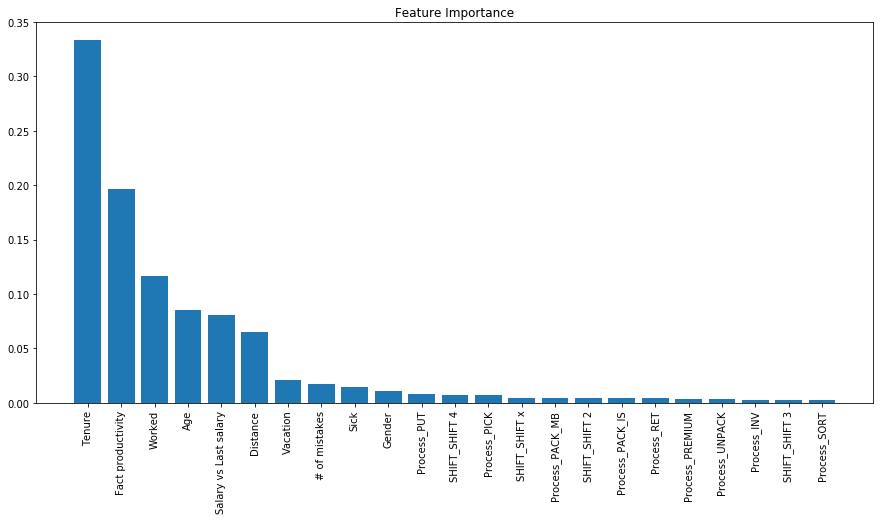

In [59]:
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [61]:
importances = rf_opt.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(23):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,Tenure,0.332918
1,Fact productivity,0.196141
2,Worked,0.116857
3,Age,0.085554
4,Salary vs Last salary,0.080903
5,Distance,0.065011
6,Vacation,0.021119
7,# of mistakes,0.017600
8,Sick,0.014449
9,Gender,0.010533


In [62]:
print('Accuracy of RandomForest Regression Classifier on test set: {:.2f}'.format(rf_opt.score(X_test, y_test)*100))

Accuracy of RandomForest Regression Classifier on test set: 73.02


In [63]:
# Classification report for the optimised RF Regression
rf_opt.fit(X_train, y_train)
print(classification_report(y_test, rf_opt.predict(X_test)))
print('Confusion Matrix\n' + str(confusion_matrix(y_test,  rf_opt.predict(X_test))))

              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84      2605
         1.0       0.16      0.65      0.25       197

    accuracy                           0.73      2802
   macro avg       0.56      0.70      0.54      2802
weighted avg       0.91      0.73      0.79      2802

Confusion Matrix
[[1917  688]
 [  68  129]]


Text(0.5, 257.44, 'Predicted label')

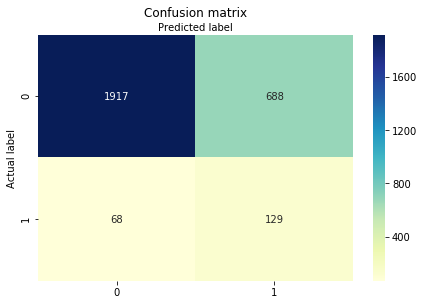

In [64]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, rf_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [65]:
rf_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = rf_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
rf_opt_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % rf_opt_roc_auc)

AUC score: 0.768


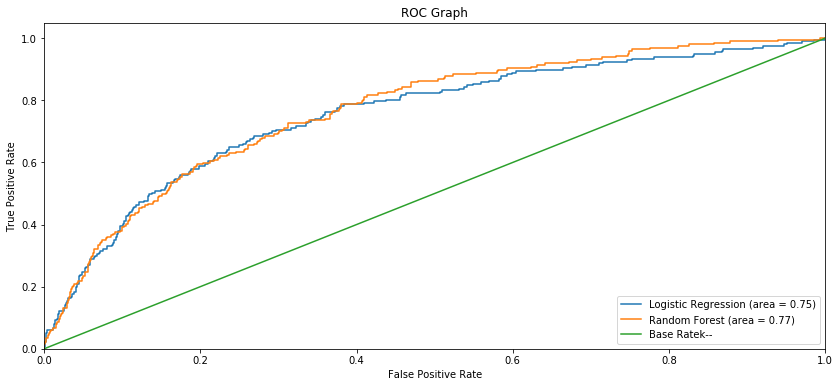

In [66]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_opt.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_opt_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()